# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнил студент гр. 0304
Жиглов Дмитрий 

Вариант №3

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный прямоугольный импульс.
<center>
    $s_1(k) = \begin{equation*}
\begin{cases}
   U, n_0 \leq k \leq n_0 + n_{imp} - 1\\
   0, иначе
 \end{cases}
\end{equation*}$
</center>

Может быть смоделирован в виде линейной комбинации дискретных единичных скачков:
<center>
    $s_1(k) = \sigma(k-n_0) - \sigma(k - (n_0 + n_{imp} - 1))$
</center>


Определение характеристик:

1. Среднее значение: $M = {1 \over N} \sum\limits_{i=0}^{N-1} x_i$

2. Энергия: $E = \sum x^2$

3. Мощность: $P = {{\sum x^2} \over N}$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

### Порядок выполнения работы

1. Смоделировать дискретный прямоугольный импульс:

<center>
    $s_1(k) = \begin{equation*}
\begin{cases}
   U, n_0 \leq k \leq n_0 + n_{imp} - 1\\
   0, иначе
 \end{cases}
\end{equation*}$
</center>


на основе дискретного единичного скачка $\sigma_d(k)$ из п/р №1 с выводом графика на интервале времени $n \in [0,N-1]$. Пояснить как выполняется моделирование импульса.

2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

<center>
$s_2(k) = a_1x_1(k) + a_2 x_2 (k) + a_3 x_3 (k)$,
</center>
где 
<center>
$x_i(k) = B_i\sin(\hat\omega_i k)$, $i = 1,2,3...$ 
</center>
<br>

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0.5N - 1]$. Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор Е) и среднюю мощность последовательности $s_2(k)$ (идентификатор Р). Пояснить:

a. операции при моделировании линейной комбинации сигналов $s_2(k)$

b. как определяют указанные характеристики.

3. Вывести график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал
<center>
    $s(k)$: $s(k) = C\cos(\hat\omega_0 k)$
</center>
с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$. Привести  аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

4. Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

5. Сделать выводы.

#### 1. Смоделируем дискретный прямоугольный импульс:

$s_1(k) = \begin{equation*}
\begin{cases}
   U, n_0 \leq k \leq n_0 + n_{imp} - 1\\
   0, иначе
 \end{cases}
\end{equation*}$

#### на основе дискретного единичного скачка $\sigma_d(k)$ из п/р №1 с выводом графика на интервале времени $n \in [0,N-1]$.

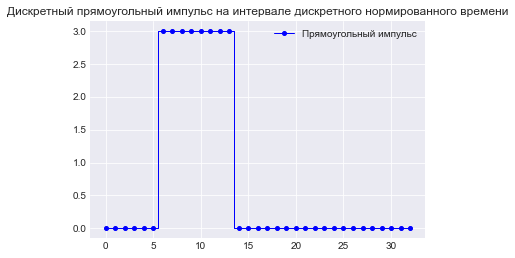

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math


def get_variables(Nb):
    v = {'Nb': Nb}
    v['N'] = 30 + Nb % 5
    v['T'] = 0.0005 * (1 + Nb % 3)
    v['a'] = (-1) ** Nb * (0.8 + 0.005 * Nb)
    v['C'] = 1 + Nb % 5
    v['w0'] = math.pi / (6 + Nb % 5)
    v['U'] = Nb
    v['n0'] = Nb % 5 + 3
    v['n_imp'] = Nb % 5 + 5
    v['B1'] = 1.5 + Nb % 5
    v['B2'] = 5.7 - Nb % 5
    v['B3'] = 2.2 + Nb % 5
    v['w1'] = math.pi / (4 + Nb % 5)
    v['w2'] = math.pi / (8 + Nb % 5)
    v['w3'] = math.pi / (16 + Nb % 5)
    v['a1'] = 1.5 - Nb % 5
    v['a2'] = 0.7 + Nb % 5
    v['a3'] = 1.4 + Nb % 5
    v['x1'] = lambda k: v['B1'] * np.sin(v['w1'] * k)
    v['x2'] = lambda k: v['B2'] * np.sin(v['w2'] * k)
    v['x3'] = lambda k: v['B3'] * np.sin(v['w3'] * k)
    return v

variables = get_variables(3)

x_norm = np.linspace(0, variables['N'] - 1, variables['N'])
rect_impulse = np.zeros(x_norm.shape)
rect_impulse[(variables['n0'] <= x_norm) & (x_norm <= variables['n0'] + variables['n_imp'] - 1)] = variables['U']

fig, ax = plt.subplots()
ax.step(x_norm, rect_impulse, where='mid', color='b', linewidth=1, linestyle='-', marker='o', markersize=4, label='Прямоугольный импульс')
ax.set_title("Дискретный прямоугольный импульс на интервале дискретного нормированного времени")
ax.legend()
plt.show()

Моделирование прямоугольного импульса происходит следующим образом:
1. Генерируется массив из нулей с количеством элементов, соответствующим интервалу времени.
2. Каждому элементу, удовлетворяющему условию, присваивается U.

#### 2. Смоделируем линейную комбинацию дискретных гармонических сигналов $s_2(k)$:
<center>
$s_2(k) = a_1x_1(k) + a_2 x_2 (k) + a_3 x_3 (k)$,
</center>
где 
<center>
$x_i(k) = B_i\sin(\hat\omega_i k)$, $i = 1,2,3...$ 
</center>
<br>

#### с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0.5N - 1]$ и вычислим среднее значение, энергию и среднюю мощность последовательности $s_2(k)$

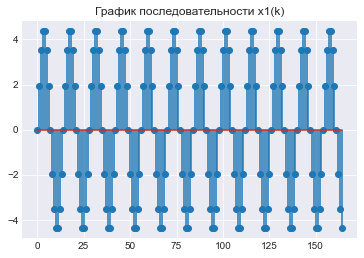

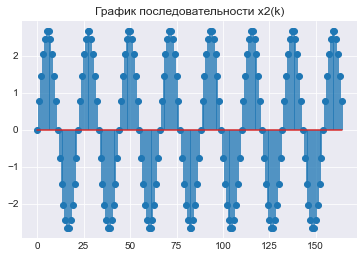

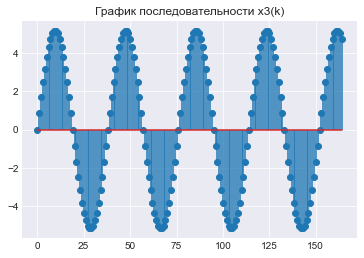

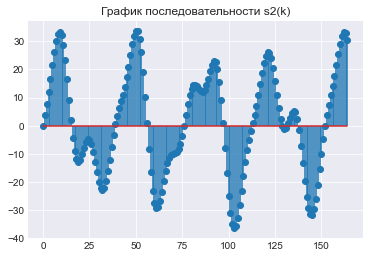

Среднее - 1.5678183541399593, Энергия - 57255.466663179, Мощность - 347.0028282616909


In [22]:
def s2(_x):
    return variables['a1'] * variables['x1'](_x) + variables['a2'] * variables['x2'](_x) + variables['a3'] * variables['x3'](_x)

x_i = np.linspace(0, 5 * variables['N'] - 1, 5 * variables['N'])
x1_sequence = variables['x1'](x_i)
x2_sequence = variables['x2'](x_i)
x3_sequence = variables['x3'](x_i)

plt.stem(x_i, x1_sequence)
plt.title("График последовательности x1(k)")
plt.show()

plt.stem(x_i, x2_sequence)
plt.title("График последовательности x2(k)")
plt.show()

plt.stem(x_i, x3_sequence)
plt.title("График последовательности x3(k)")
plt.show()


ans = s2(x_i)


plt.stem(x_i, ans)
plt.title("График последовательности s2(k)")
plt.show()


print(f'Среднее - {ans.mean()}, Энергия - {np.power(ans, 2).sum()}, Мощность - {np.power(ans, 2).mean()}')

#### 3. Выведем график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)$: $s(k) = C\cos(\hat\omega_0 k)$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$.

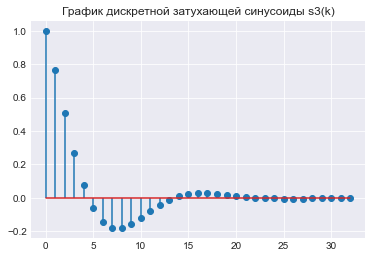

In [23]:
def s3(_x):
    return (np.abs(variables['a']) ** _x) * np.cos(variables['w0'] * _x)

plt.stem(x_norm, s3(x_norm))
plt.title("График дискретной затухающей синусоиды s3(k)")
plt.show()

Аналитическая формула дискретного сигнала
$s_3(k)=|a|^kcos(\omega_0k)$


Операции при моделировании данного сигнала:

1. Расчет экспоненциальной составляющей.
2. Расчет гармонической составляющей. 
3. Перемножение полученных сигналов.

#### 4. Выведем график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса.

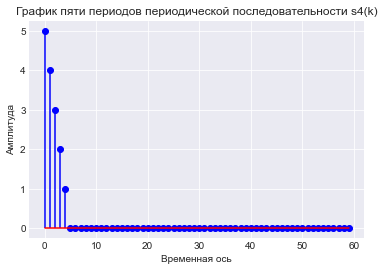

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция rect для создания прямоугольных импульсов
def rect(t, T):
    return (abs(t) <= T/2).astype(float)

# Параметры
variables = {'N': 20, 'n_imp': 1}

# Генерация данных
x_i = np.linspace(0, 3 * variables['N'] - 1, 3 * variables['N'])
y = np.zeros(shape=x_i.shape)

for i in range(5):
    y += rect(x_i, 2 * variables['n_imp'] * i)


plt.style.use('seaborn-darkgrid')

# Построение графика
plt.stem(x_i, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title("График пяти периодов периодической последовательности s4(k)")
plt.xlabel("Временная ось")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

Операции при моделировании периодической последовательности:

1. Сгенерировать массив из нулей с количеством элементов, соответствующим 3 * N.
2. Сгенерировать 5 прямоугольных импульсов с соответствующим смещением.
3. Сложить эти импульсы в последовательность.

## Выводы
Проведено исследование дискретного прямоугольного импульса, выявлена его взаимосвязь с дискретным единичным скачком, и разработана формула зависимости. Также проанализирована линейная комбинация дискретных гармонических сигналов, с последующей визуализацией. Для изученной комбинации рассчитаны характеристики дискретных сигналов, такие как среднее значение, энергия и средняя мощность. В рамках исследования рассмотрен дискретный гармонический сигнал с экспоненциальной огибающей; записана его формула, а также визуально представлено воздействие огибающей, вызывающее затухание сигнала. Дополнительно рассмотрен сигнал, состоящий из пяти прямоугольных импульсов, с подробным рассмотрением процесса его формирования путем наложения отдельных сигналов друг на друга.